In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Imports**

In [ ]:
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
print('Done')

Done


# **Data importing**

In [ ]:
artemis_preprocessed = pd.read_csv('/content/drive/MyDrive/College/Sem 6/CV/Project/datasets/artemis_preprocessed.csv')

# **Data exploration**

In [ ]:
artemis_preprocessed.head(15)

,art_style,painting,emotion,utterance,repetition,split,tokens,tokens_len,utterance_spelled,tokens_encoded,emotion_label
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10,train,"['she', 'seems', 'very', 'happy', 'in', 'the',...",18,she seems very happy in the picture and you wa...,"[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",8
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,sadness,This woman has really knotty hands which makes...,10,train,"['this', 'woman', 'has', 'really', 'knotty', '...",14,this woman has really knotty hands which makes...,"[1, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30...",7
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"When looking at this woman, I am filled with c...",10,train,"['when', 'looking', 'at', 'this', 'woman', 'i'...",27,when looking at this woman i am filled with cu...,"[1, 32, 33, 34, 20, 21, 35, 36, 37, 38, 39, 40...",8
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,contentment,"A woman looking at ease, peaceful, and satisfi...",10,train,"['a', 'woman', 'looking', 'at', 'ease', 'peace...",15,a woman looking at ease peaceful and satisfied...,"[1, 45, 21, 33, 34, 48, 49, 11, 50, 51, 28, 52...",2
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,awe,She looks like a lady from that past that migh...,10,train,"['she', 'looks', 'like', 'a', 'lady', 'from', ...",33,she looks like a lady from that past that migh...,"[1, 4, 56, 30, 45, 57, 58, 59, 60, 59, 61, 62,...",1
5,Expressionism,wassily-kandinsky_study-for-autumn-1909,awe,The bright colors make a very unique scene for...,7,train,"['the', 'bright', 'colors', 'make', 'a', 'very...",12,the bright colors make a very unique scene for...,"[1, 9, 77, 78, 79, 45, 6, 80, 81, 73, 9, 82, 8...",1
6,Expressionism,wassily-kandinsky_study-for-autumn-1909,something else,"The way the image is presented, with large chu...",7,train,"['the', 'way', 'the', 'image', 'is', 'presente...",43,the way the image is presented with large chun...,"[1, 9, 84, 9, 85, 17, 86, 38, 87, 88, 89, 90, ...",8
7,Impressionism,konstantin-korovin_yaroslavna-s-lament-1909,awe,the stroke of blue paint used to outline the h...,7,train,"['the', 'stroke', 'of', 'blue', 'paint', 'used...",13,the stroke of blue paint used to outline the h...,"[1, 9, 108, 89, 109, 90, 91, 14, 110, 9, 111, ...",1
8,Impressionism,konstantin-korovin_yaroslavna-s-lament-1909,sadness,Some of the wooden panels are falling from the...,7,train,"['some', 'of', 'the', 'wooden', 'panels', 'are...",10,some of the wooden panels are falling from the...,"[1, 113, 89, 9, 114, 115, 116, 117, 58, 9, 118...",7
9,Impressionism,paul-gauguin_mette-gauguin-in-an-evening-dress...,awe,The golden gloves and white dress stand out an...,7,train,"['the', 'golden', 'gloves', 'and', 'white', 'd...",17,the golden gloves and white dress stand out an...,"[1, 9, 119, 120, 11, 121, 122, 123, 124, 11, 1...",1


In [ ]:
artemis_preprocessed[artemis_preprocessed['split'] == 'train']

,art_style,painting,emotion,utterance,repetition,split,tokens,tokens_len,utterance_spelled,tokens_encoded,emotion_label
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10,train,"['she', 'seems', 'very', 'happy', 'in', 'the',...",18,she seems very happy in the picture and you wa...,"[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",8
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,sadness,This woman has really knotty hands which makes...,10,train,"['this', 'woman', 'has', 'really', 'knotty', '...",14,this woman has really knotty hands which makes...,"[1, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30...",7
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"When looking at this woman, I am filled with c...",10,train,"['when', 'looking', 'at', 'this', 'woman', 'i'...",27,when looking at this woman i am filled with cu...,"[1, 32, 33, 34, 20, 21, 35, 36, 37, 38, 39, 40...",8
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,contentment,"A woman looking at ease, peaceful, and satisfi...",10,train,"['a', 'woman', 'looking', 'at', 'ease', 'peace...",15,a woman looking at ease peaceful and satisfied...,"[1, 45, 21, 33, 34, 48, 49, 11, 50, 51, 28, 52...",2
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,awe,She looks like a lady from that past that migh...,10,train,"['she', 'looks', 'like', 'a', 'lady', 'from', ...",33,she looks like a lady from that past that migh...,"[1, 4, 56, 30, 45, 57, 58, 59, 60, 59, 61, 62,...",1
...,...,...,...,...,...,...,...,...,...,...,...
454678,Cubism,willi-baumeister_machine-man-with-spiral-turn-...,something else,The interlocking mechanical shapes fitting tog...,50,train,"['the', 'interlocking', 'mechanical', 'shapes'...",10,the interlocking mechanical shapes fitting tog...,"[1, 9, 10325, 6659, 83, 4371, 749, 116, 4136, ...",8
454679,Cubism,gino-severini_a-dancer-1,awe,the collection and collage of different colors...,48,train,"['the', 'collection', 'and', 'collage', 'of', ...",12,the collection and collage of different colors...,"[1, 9, 4867, 11, 4370, 89, 272, 78, 11, 83, 10...",1
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,The peaceful reflections of the moonlight on t...,8,train,"['the', 'peaceful', 'reflections', 'of', 'the'...",14,the peaceful reflections of the moonlight on t...,"[1, 9, 49, 4037, 89, 9, 456, 43, 9, 269, 126, ...",1
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,I can imagine the sailors resting this peacefu...,8,train,"['i', 'can', 'imagine', 'the', 'sailors', 'res...",13,i can imagine the sailors resting this peacefu...,"[1, 35, 149, 760, 9, 6361, 1942, 20, 49, 222, ...",3


In [ ]:
artemis_preprocessed.iloc[0]['utterance_spelled']

'she seems very happy in the picture and you want to know what what is behind the smile'

In [ ]:
artemis_preprocessed.iloc[0]['tokens_encoded']

'[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 16, 17, 18, 9, 19, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'

In [ ]:
len(artemis_preprocessed.iloc[0]['tokens'].split(','))

18

In [ ]:
#Let's get the dataset lenght
len(artemis_preprocessed)

454684

In [ ]:
#Is there any other different value than neutral, negative and positive?
artemis_preprocessed['emotion'].unique()

array(['something else', 'sadness', 'contentment', 'awe', 'amusement',
       'excitement', 'fear', 'disgust', 'anger'], dtype=object)

In [ ]:
artemis_preprocessed['emotion_label'].unique()

array([8, 7, 2, 1, 0, 3, 6, 5, 4])

In [ ]:
#How's distributed the dataset? Is it biased?
artemis_preprocessed.groupby('emotion_label').nunique()

,art_style,painting,emotion,utterance,repetition,split,tokens,tokens_len,utterance_spelled,tokens_encoded
emotion_label,,,,,,,,,,
0,27,29014,1,45287,26,3,45267,102,45267,45267
1,27,43866,1,72789,27,3,72776,110,72776,72776
2,27,56053,1,125927,27,3,125876,113,125876,125876
3,27,26732,1,37574,27,3,37564,101,37564,37564
4,27,5860,1,6631,24,3,6631,79,6631,6631
5,27,16921,1,22385,26,3,22383,96,22383,22383
6,27,24932,1,41550,25,3,41535,98,41535,41535
7,27,29339,1,48993,26,3,48957,108,48957,48957
8,27,36574,1,52854,27,3,52825,124,52825,52825


In [ ]:
artemis_preprocessed.drop(['tokens_encoded', 'split'], axis = 1)

,art_style,painting,emotion,utterance,repetition,tokens,tokens_len,utterance_spelled,emotion_label
0,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"She seems very happy in the picture, and you w...",10,"['she', 'seems', 'very', 'happy', 'in', 'the',...",18,she seems very happy in the picture and you wa...,8
1,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,sadness,This woman has really knotty hands which makes...,10,"['this', 'woman', 'has', 'really', 'knotty', '...",14,this woman has really knotty hands which makes...,7
2,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,something else,"When looking at this woman, I am filled with c...",10,"['when', 'looking', 'at', 'this', 'woman', 'i'...",27,when looking at this woman i am filled with cu...,8
3,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,contentment,"A woman looking at ease, peaceful, and satisfi...",10,"['a', 'woman', 'looking', 'at', 'ease', 'peace...",15,a woman looking at ease peaceful and satisfied...,2
4,Post_Impressionism,vincent-van-gogh_portrait-of-madame-ginoux-l-a...,awe,She looks like a lady from that past that migh...,10,"['she', 'looks', 'like', 'a', 'lady', 'from', ...",33,she looks like a lady from that past that migh...,1
...,...,...,...,...,...,...,...,...,...
454679,Cubism,gino-severini_a-dancer-1,awe,the collection and collage of different colors...,48,"['the', 'collection', 'and', 'collage', 'of', ...",12,the collection and collage of different colors...,1
454680,Romanticism,ivan-aivazovsky_sea-at-night-1861,awe,The peaceful reflections of the moonlight on t...,8,"['the', 'peaceful', 'reflections', 'of', 'the'...",14,the peaceful reflections of the moonlight on t...,1
454681,Romanticism,ivan-aivazovsky_sea-at-night-1861,excitement,I can imagine the sailors resting this peacefu...,8,"['i', 'can', 'imagine', 'the', 'sailors', 'res...",13,i can imagine the sailors resting this peacefu...,3
454682,Romanticism,ivan-aivazovsky_sea-at-night-1861,contentment,The steep mountains and the moonlight provide ...,8,"['the', 'steep', 'mountains', 'and', 'the', 'm...",15,the steep mountains and the moonlight provide ...,2


# **One hot encoding**

As the dataset has labels 0, 1...8. We need to convert them to one hot vector.

In [ ]:
labels = np.array(artemis_preprocessed['emotion_label'])


In [ ]:
print (labels)

[8 7 8 ... 3 2 6]


In [ ]:
labels = tf.keras.utils.to_categorical(labels, 9, dtype="float32")

In [ ]:
print (labels)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
len(labels)

454684

# **Data sequencing and splitting**

We'll implement the Keras tokenizer as well as its pad_sequences method to transform our text data into 3D float data, otherwise our neural networks won't be able to be trained on it.

In [ ]:
artemis_preprocessed['utterance']

0         She seems very happy in the picture, and you w...
1         This woman has really knotty hands which makes...
2         When looking at this woman, I am filled with c...
3         A woman looking at ease, peaceful, and satisfi...
4         She looks like a lady from that past that migh...
                                ...                        
454679    the collection and collage of different colors...
454680    The peaceful reflections of the moonlight on t...
454681    I can imagine the sailors resting this peacefu...
454682    The steep mountains and the moonlight provide ...
454683    If you look at the colors individually they ar...
Name: utterance, Length: 454684, dtype: object

In [ ]:
unique_words = set()
for utterance in artemis_preprocessed['utterance_spelled']:
    for word in utterance.split(' '):
      unique_words.add(word)

In [ ]:
len(unique_words)

37251

In [ ]:
too_long_len = np.percentile(artemis_preprocessed['tokens_len'], 100)

In [ ]:
too_long_len

207.0

In [ ]:
data = np.array(artemis_preprocessed['utterance_spelled'])

In [ ]:
data[:5]

array(['she seems very happy in the picture and you want to know what what is behind the smile',
       'this woman has really knotty hands which makes her look like she has arthritis',
       'when looking at this woman i am filled with curiosity about what she is thinking about with her elbow on the table and a very emotionless face',
       'a woman looking at ease peaceful and satisfied amongst her books makes me feel content',
       'she looks like a lady from that past that might have been a teacher ( books ) she looks tired and i wondered how hard it must have been for them back then'],
      dtype=object)

In [ ]:
len(data)

454684

In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 37521
max_len = 207

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
utterances = pad_sequences(sequences, maxlen=max_len)
print(utterances)

[[    0     0     0 ...   243     1   339]
 [    0     0     0 ...    33    41 15713]
 [    0     0     0 ...    22  3532    44]
 ...
 [    0     0     0 ...     5   464  3114]
 [    0     0     0 ...     1  1555  3839]
 [    0     0     0 ...   770 17887     9]]


In [ ]:
utterances

array([[    0,     0,     0, ...,   243,     1,   339],
       [    0,     0,     0, ...,    33,    41, 15713],
       [    0,     0,     0, ...,    22,  3532,    44],
       ...,
       [    0,     0,     0, ...,     5,   464,  3114],
       [    0,     0,     0, ...,     1,  1555,  3839],
       [    0,     0,     0, ...,   770, 17887,     9]], dtype=int32)

In [ ]:
artemis_preprocessed.iloc[0]['tokens_encoded']

'[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 16, 17, 18, 9, 19, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'

In [ ]:
new_tokens_encoded = []

In [ ]:
for tokens_encoded in artemis_preprocessed['tokens_encoded']:
  tokens_encoded = tokens_encoded[1:-3]
  tokens_encoded = tokens_encoded.strip(',')
  tokens_encoded = tokens_encoded.split(', ')
  tokens_encoded = [int(x) for x in tokens_encoded]
  tokens_encoded = np.array(tokens_encoded)
  new_tokens_encoded.append(tokens_encoded)

In [ ]:
artemis_preprocessed['new_tokens_encoded'] = new_tokens_encoded

In [ ]:
utterances[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
len(utterances)

454684

In [ ]:
len(utterances[19])

207

In [ ]:
print(labels)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
len(new_tokens_encoded[0])

208

In [ ]:
# Train Test Split using Startified Sampling
# 80% - Training Data and 20% - Testing Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(utterances, labels, test_size = 0.2, 
                                                    random_state = 1, stratify = labels)
print (len(X_train),len(X_test),len(y_train),len(y_test))

363747 90937 363747 90937


# **Train, Test Split using the base papers encoding**

In [ ]:
from sklearn.model_selection import train_test_split

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(new_tokens_encoded, labels, test_size = 0.2, 
                                                    random_state = 1, stratify = labels)
print (len(X_train_base),len(X_test_base),len(y_train_base),len(y_test_base))

363747 90937 363747 90937


## **Function to plot learning curves**

In [ ]:
from matplotlib import pyplot

def summarize_model(history):
	# plot loss during training
  pyplot.figure(figsize=(8,6))
  pyplot.subplot(211)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='validation')
  pyplot.legend()
  # plot accuracy during training
  pyplot.subplot(212)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='validation')
  pyplot.legend()
  pyplot.show()

# **Classification Report Helper Functions**

In [ ]:
# Function to get a list of values of a performance metric corresponding to each class 
# Possible performance metrics: precision, recall and f1_score

def get_performance_from_classification_report(report, performance_metric):
  performance = []
  for class_id in range(9):
    class_id = str(class_id)
    performance.append(round(report[class_id][performance_metric], 2))
  return performance

In [ ]:
# Function to plot performance bar plot to show classification report graphically

import numpy as np
import matplotlib.pyplot as plt

def draw_performance_plot(precision, recall, f1_score, model_name): 
	barWidth = 0.25
	fig = plt.subplots(figsize =(12, 8))
 
	br1 = np.arange(9)
	br2 = [x + barWidth for x in br1]
	br3 = [x + barWidth for x in br2]

	plt.bar(br1, precision, color ='mediumaquamarine', width = barWidth,
			edgecolor ='grey', label ='Precision')
	plt.bar(br2, recall, color ='palegreen', width = barWidth,
			edgecolor ='grey', label ='Recall')
	plt.bar(br3, f1_score, color ='moccasin', width = barWidth,
			edgecolor ='grey', label ='F1 Score')

	plt.title(f'Performance of {model_name} on Artemis', fontweight ='bold', fontsize = 20)
	plt.ylabel('Performance', fontweight ='bold', fontsize = 15)
	plt.xlabel('Classes', fontweight ='bold', fontsize = 15)
	plt.xticks([r + barWidth for r in range(9)], classes)

	plt.legend()
	plt.show()

# **Single LSTM layer model**

In [ ]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 207))
model1.add(layers.LSTM(15, dropout=0.5))
model1.add(layers.Dense(9,activation='softmax'))


model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 208)         7804368   
                                                                 
 lstm_1 (LSTM)               (None, 15)                13440     
                                                                 
 dense_1 (Dense)             (None, 9)                 144       
                                                                 
Total params: 7,817,952
Trainable params: 7,817,952
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Implementing model checkpoins to save the best metric and do not lose it on training.
#checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=20,validation_split = 0.2) #,callbacks=[checkpoint1])

Epoch 1/20
9094/9094 [==============================] - 354s 39ms/step - loss: 1.2779 - accuracy: 0.5615 - val_loss: 1.1529 - val_accuracy: 0.6045
Epoch 2/20
9094/9094 [==============================] - 346s 38ms/step - loss: 1.1333 - accuracy: 0.6133 - val_loss: 1.1181 - val_accuracy: 0.6165
Epoch 3/20
9094/9094 [==============================] - 341s 37ms/step - loss: 1.0971 - accuracy: 0.6261 - val_loss: 1.1116 - val_accuracy: 0.6183
Epoch 4/20
9094/9094 [==============================] - 341s 37ms/step - loss: 1.0757 - accuracy: 0.6332 - val_loss: 1.1037 - val_accuracy: 0.6204
Epoch 5/20
9094/9094 [==============================] - 354s 39ms/step - loss: 1.0612 - accuracy: 0.6388 - val_loss: 1.1056 - val_accuracy: 0.6209
Epoch 6/20
9094/9094 [==============================] - 342s 38ms/step - loss: 1.0503 - accuracy: 0.6433 - val_loss: 1.1052 - val_accuracy: 0.6219
Epoch 7/20
9094/9094 [==============================] - 341s 37ms/step - loss: 1.0424 - accuracy: 0.6466 - val_loss: 1

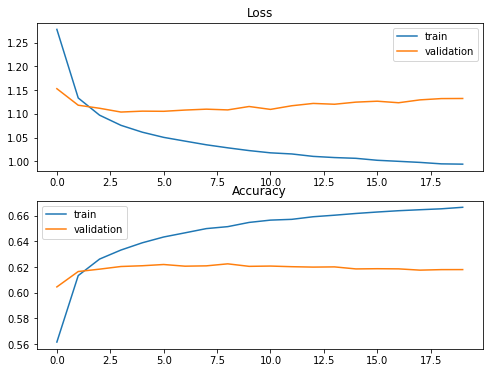

In [ ]:
# Learning curve for the model

summarize_model(history)

In [ ]:
# Evaluating the trained LSTM model on the test data
testLoss, testAccuracy= model1.evaluate(X_test, y_test)

2842/2842 [==============================] - 39s 14ms/step - loss: 1.1383 - accuracy: 0.6176


The test average accuracy is 61.76%

In [ ]:
# Using the LSTM model to make predictions
y_pred = model1.predict(X_test)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test, axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_LSTM_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.53      0.56      9067
           1       0.55      0.54      0.54     14586
           2       0.64      0.76      0.69     25227
           3       0.59      0.40      0.48      7527
           4       0.54      0.26      0.35      1328
           5       0.56      0.51      0.53      4482
           6       0.65      0.71      0.68      8315
           7       0.69      0.73      0.71      9812
           8       0.61      0.53      0.57     10593

    accuracy                           0.62     90937
   macro avg       0.60      0.55      0.57     90937
weighted avg       0.61      0.62      0.61     90937



In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_LSTM_dict, 'precision')
recall =  get_performance_from_classification_report(report_LSTM_dict, 'recall')
f1_score = get_performance_from_classification_report(report_LSTM_dict, 'f1-score')

In [ ]:
classes = artemis_preprocessed['emotion'].unique()

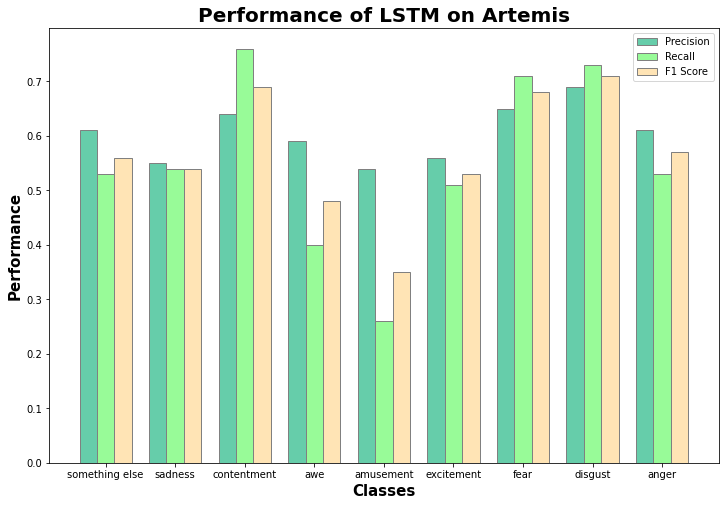

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'LSTM')

# **LSTM model 2**

In [ ]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 207))
model2.add(layers.LSTM(50, dropout=0.5))
model2.add(layers.Dense(9,activation='softmax'))

model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 207)         7766847   
                                                                 
 lstm_4 (LSTM)               (None, 50)                51600     
                                                                 
 dense_2 (Dense)             (None, 9)                 459       
                                                                 
Total params: 7,818,906
Trainable params: 7,818,906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Implementing model checkpoins to save the best metric and do not lose it on training.
#checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history_2_10 = model2.fit(X_train, y_train, epochs=10,validation_split = 0.2) #,callbacks=[checkpoint1])

Epoch 1/10
9094/9094 [==============================] - 438s 47ms/step - loss: 1.2686 - accuracy: 0.5605 - val_loss: 1.1344 - val_accuracy: 0.6074
Epoch 2/10
9094/9094 [==============================] - 426s 47ms/step - loss: 1.1104 - accuracy: 0.6173 - val_loss: 1.0943 - val_accuracy: 0.6227
Epoch 3/10
9094/9094 [==============================] - 425s 47ms/step - loss: 1.0694 - accuracy: 0.6321 - val_loss: 1.0783 - val_accuracy: 0.6270
Epoch 4/10
9094/9094 [==============================] - 424s 47ms/step - loss: 1.0444 - accuracy: 0.6424 - val_loss: 1.0811 - val_accuracy: 0.6275
Epoch 5/10
9094/9094 [==============================] - 422s 46ms/step - loss: 1.0266 - accuracy: 0.6493 - val_loss: 1.0758 - val_accuracy: 0.6294
Epoch 6/10
9094/9094 [==============================] - 427s 47ms/step - loss: 1.0123 - accuracy: 0.6545 - val_loss: 1.0748 - val_accuracy: 0.6296
Epoch 7/10
9094/9094 [==============================] - 425s 47ms/step - loss: 1.0016 - accuracy: 0.6591 - val_loss: 1

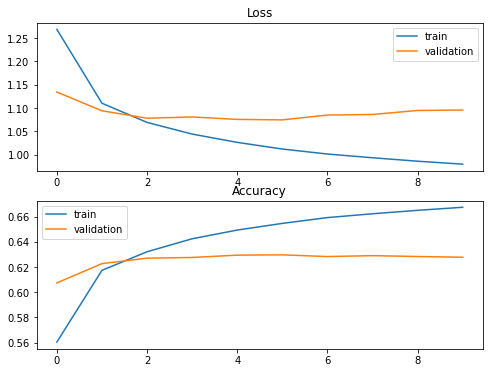

In [ ]:
# Learning curve for the model

summarize_model(history_2_10)

In [ ]:
# Evaluating the trained LSTM model on the test data
testLoss, testAccuracy= model2.evaluate(X_test, y_test)

2842/2842 [==============================] - 51s 18ms/step - loss: 1.1034 - accuracy: 0.6268


The test average accuracy is 62.68%

In [ ]:
# Using the LSTM model to make predictions
y_pred = model2.predict(X_test)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test, axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_LSTM_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.53      0.57      9067
           1       0.56      0.55      0.56     14586
           2       0.64      0.77      0.70     25227
           3       0.63      0.39      0.48      7527
           4       0.58      0.27      0.37      1328
           5       0.56      0.53      0.55      4482
           6       0.62      0.75      0.68      8315
           7       0.70      0.73      0.72      9812
           8       0.64      0.54      0.59     10593

    accuracy                           0.63     90937
   macro avg       0.62      0.56      0.58     90937
weighted avg       0.63      0.63      0.62     90937



In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_LSTM_dict, 'precision')
recall =  get_performance_from_classification_report(report_LSTM_dict, 'recall')
f1_score = get_performance_from_classification_report(report_LSTM_dict, 'f1-score')

In [ ]:
classes = artemis_preprocessed['emotion'].unique()

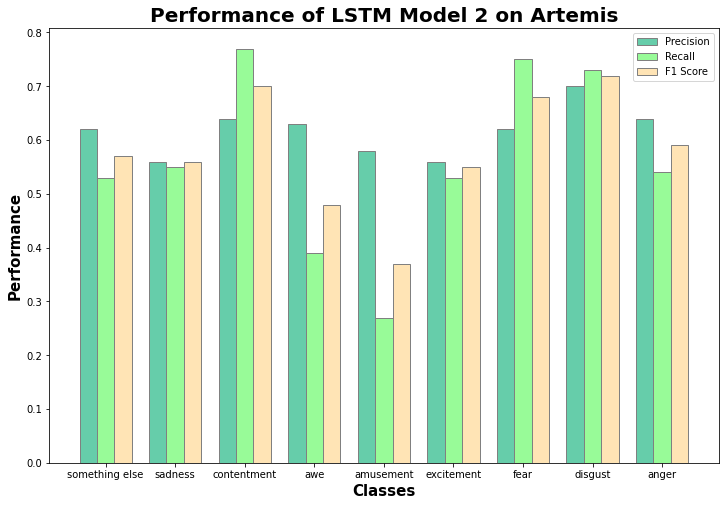

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'LSTM Model 2')

# **Running LSTM model on base paper tokens**

In [ ]:
#Implementing model checkpoins to save the best metric and do not lose it on training.
#checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history_base_1_10 = model1.fit(X_train_base, y_train_base, epochs=10,validation_split = 0.2) #,callbacks=[checkpoint1])

KeyboardInterrupt: ignored

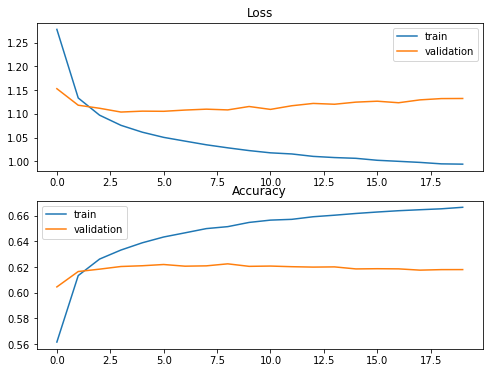

In [ ]:
# Learning curve for the model

summarize_model(history_base_1_10)

In [ ]:
# Evaluating the trained LSTM model on the test data
testLoss, testAccuracy= model1.evaluate(X_test_base, y_test_base)

2842/2842 [==============================] - 39s 14ms/step - loss: 1.1383 - accuracy: 0.6176


The test average accuracy is 33%

In [ ]:
# Using the LSTM model to make predictions
y_pred_base = model1.predict(X_test_base)

In [ ]:
import numpy as np 
# Converting the predicted classes and actual classes vectors to get the predicted and actual classes
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true_classes = np.argmax(y_test, axis = 1)

**Output precision, recall, F1-score for each class**

In [ ]:
# Classification Report
from sklearn.metrics import classification_report 

report_LSTM_dict = classification_report(y_true_classes, y_pred_classes, output_dict = True)
report = classification_report(y_true_classes, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.53      0.56      9067
           1       0.55      0.54      0.54     14586
           2       0.64      0.76      0.69     25227
           3       0.59      0.40      0.48      7527
           4       0.54      0.26      0.35      1328
           5       0.56      0.51      0.53      4482
           6       0.65      0.71      0.68      8315
           7       0.69      0.73      0.71      9812
           8       0.61      0.53      0.57     10593

    accuracy                           0.62     90937
   macro avg       0.60      0.55      0.57     90937
weighted avg       0.61      0.62      0.61     90937



In [ ]:
# Storing the class-wise values of performance metrics which will be needed to draw the bar plot

precision = get_performance_from_classification_report(report_LSTM_dict, 'precision')
recall =  get_performance_from_classification_report(report_LSTM_dict, 'recall')
f1_score = get_performance_from_classification_report(report_LSTM_dict, 'f1-score')

In [ ]:
classes = artemis_preprocessed['emotion'].unique()

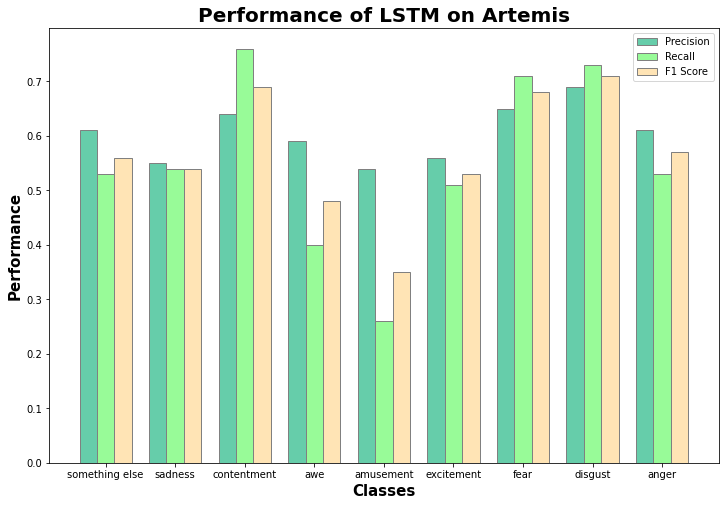

In [ ]:
# Displaying classification report as a bar plot
draw_performance_plot(precision, recall, f1_score, 'LSTM')